#NCF

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models



In [ ]:

df = pd.read_csv('/content/supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


<Axes: >

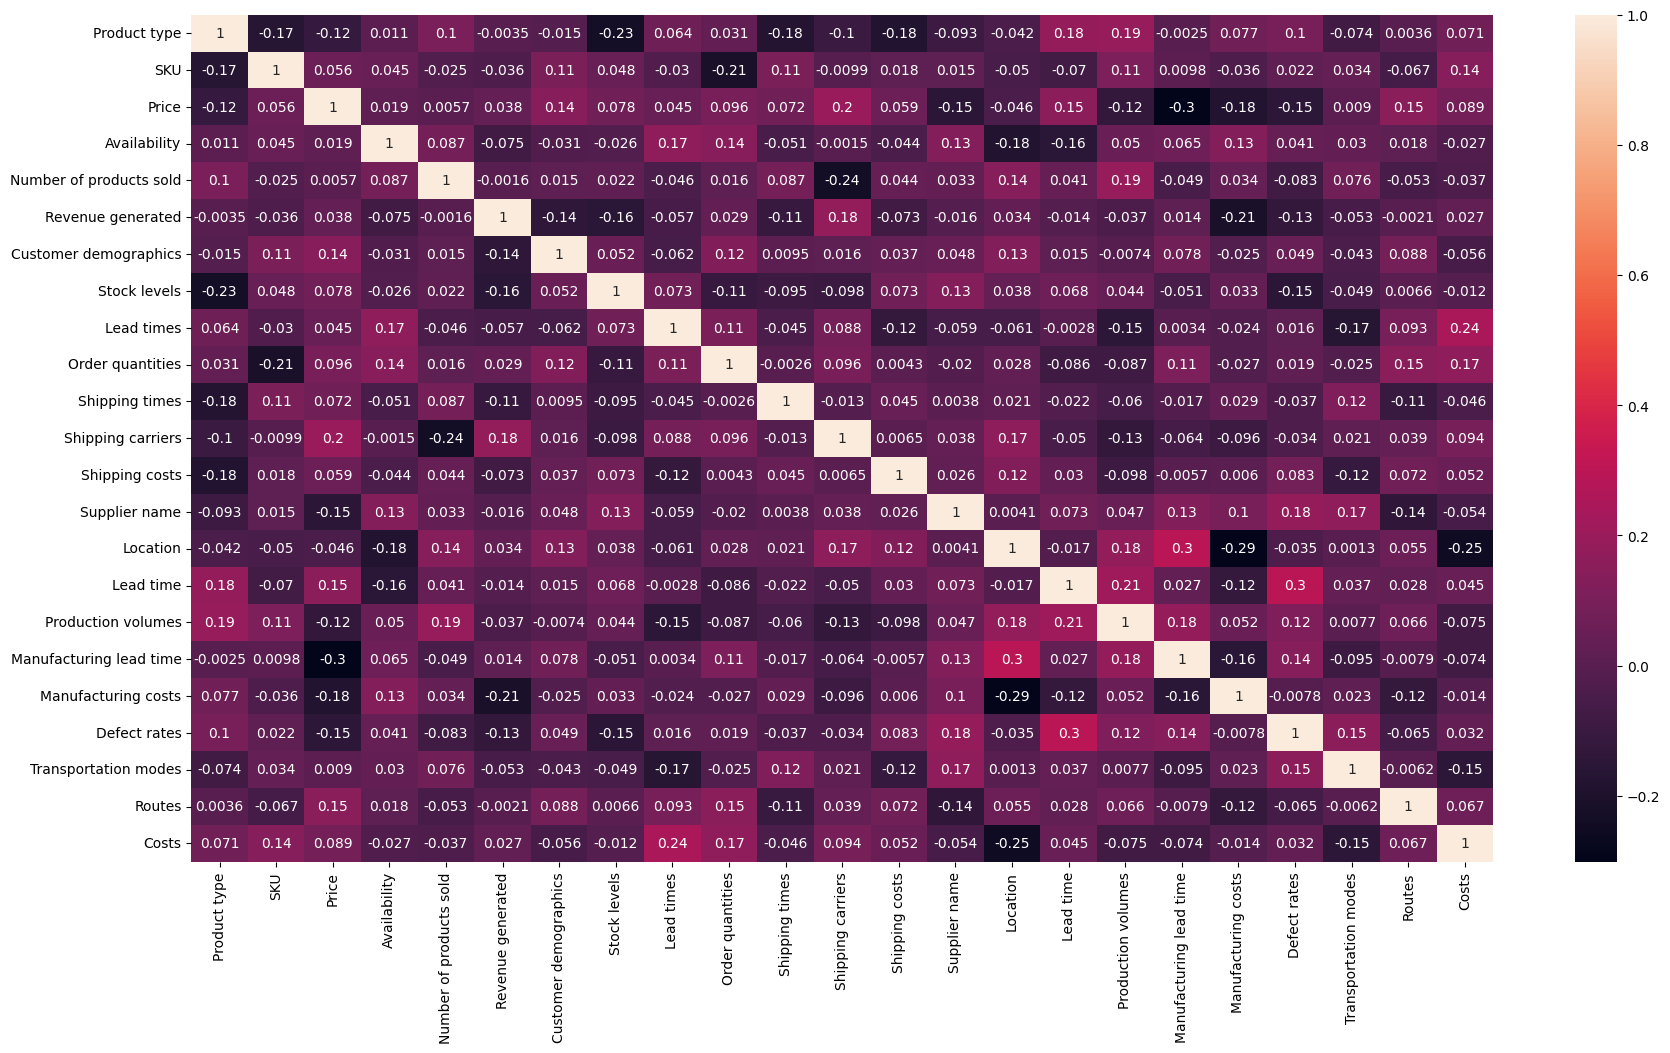

In [ ]:
# Encode categorical target variable (Supplier name)
df1 = pd.read_csv('/content/supply_chain_data.csv')
le_supplier = LabelEncoder()
df1['Supplier name'] = le_supplier.fit_transform(df1['Supplier name'])

# Encode other categorical variables for correlation analysis
categorical_cols = ['Product type', 'Customer demographics', 'Location', 'Transportation modes', 'Routes', 'Shipping carriers','SKU']
for col in categorical_cols:
    le = LabelEncoder()
    df1[col] = le.fit_transform(df1[col])
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.figure(figsize=(21,11))
numeric_col = df1.select_dtypes(include=['number']).columns
correlation = df1[numeric_col].corr()
sns.heatmap(correlation, annot=True)

In [ ]:


# Encoding categorical features
le_routes = LabelEncoder()
le_modes = LabelEncoder()
le_suppliers = LabelEncoder()


df['Routes'] = le_routes.fit_transform(df['Routes'])
df['Transportation modes'] = le_modes.fit_transform(df['Transportation modes'])
df['Supplier name'] = le_suppliers.fit_transform(df['Supplier name'])

# Features and labels
X = df[['Routes', 'Transportation modes', 'Stock levels', 'Availability', 'Shipping costs','Number of products sold']]
y = df['Supplier name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)



In [ ]:
# NCF model definition
from tensorflow.keras.layers import Dropout

def create_ncf_model(input_shape, num_suppliers):
    inputs = layers.Input(shape=input_shape)
    dense = layers.Dense(128, activation='relu')(inputs)
    #dense = Dropout(0.3)(dense)
    dense = layers.Dense(64, activation='relu')(dense)
    dense = Dropout(0.3)(dense)
    dense = layers.Dense(32, activation='relu')(dense)
    #dense = layers.Dense(16, activation='relu')(dense)
    outputs = layers.Dense(num_suppliers, activation='softmax')(dense)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Model creation
num_suppliers = len(le_suppliers.classes_)
model = create_ncf_model(X_train.shape[1:], num_suppliers)




In [ ]:
# Train the model and store the training history
history = model.fit(X_train, y_train, epochs=250, batch_size=10, verbose=1)

# Find the best training accuracy
best_training_accuracy = max(history.history['accuracy'])
print(f"Best Accuracy: {best_training_accuracy:.2f}")


Epoch 1/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1479 - loss: 8.3127
Epoch 2/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3126 - loss: 3.3732 
Epoch 3/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2511 - loss: 2.8975 
Epoch 4/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2378 - loss: 3.6836 
Epoch 5/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2841 - loss: 2.1781 
Epoch 6/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1804 - loss: 2.2127 
Epoch 7/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3061 - loss: 1.9636 
Epoch 8/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3976 - loss: 1.7452 
Epoch 9/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2762 - loss: 1.9105 
Epoch 10/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2767 - loss: 1.6803 
Epoch 11/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2007 - loss: 1.8889 
Epoch 12/250
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2529 - loss

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 1.6333333333333333
Mean Squared Error (MSE): 3.9
Root Mean Squared Error (RMSE): 1.9748417658131499
R-Squared (R²): -1.1350364963503647


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Accuracy: 0.22
Precision: 0.40
Recall: 0.22
F1 Score: 0.22


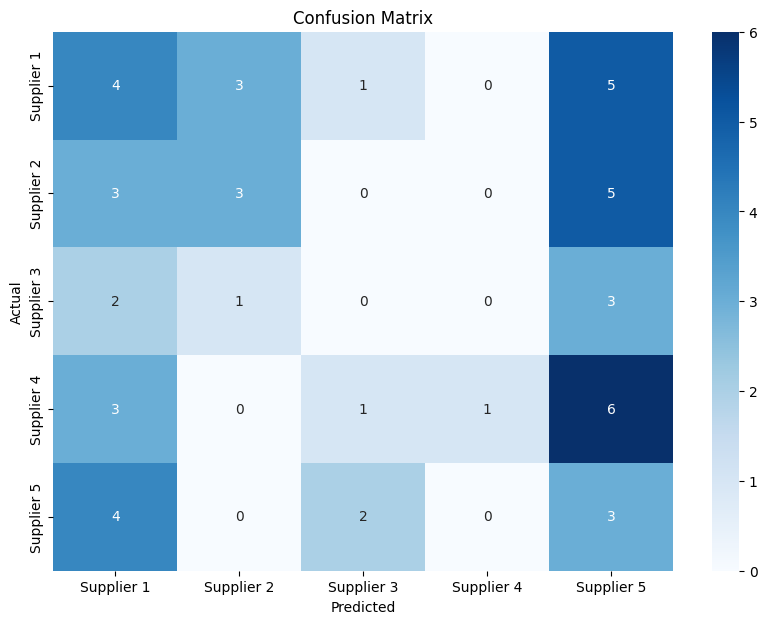

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le_suppliers.classes_, yticklabels=le_suppliers.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Evaluate model
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4 3 1 0 5]
 [3 3 0 0 5]
 [2 1 0 0 3]
 [3 0 1 1 6]
 [4 0 2 0 3]]


In [ ]:
# Example of testing with new data
new_data = pd.DataFrame({
    'Routes': ['Route A'],
    'Transportation modes': ['Air'],
    'Stock levels': [150],
    'Availability': [1],
    'Shipping costs': [900],
    'Number of products sold': [20]
})

# Preprocess new data
new_data['Routes'] = le_routes.transform(new_data['Routes'])
new_data['Transportation modes'] = le_modes.transform(new_data['Transportation modes'])

# Make prediction
new_pred_probs = model.predict(new_data)
new_pred = np.argmax(new_pred_probs, axis=1)
recommended_supplier = le_suppliers.inverse_transform(new_pred)

print("Recommended Supplier:", recommended_supplier)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
Recommended Supplier: ['Supplier 2']


In [ ]:
import re
import numpy as np
import pandas as pd

# Assume le_routes, le_modes, and le_suppliers are pre-trained LabelEncoders

# Function to extract numeric values from the sentence (e.g., stock level, shipping costs, etc.)
def extract_numeric_value(text, keyword):
    match = re.search(f"{keyword} (\d+)", text)
    return int(match.group(1)) if match else None

# Function to extract specific keywords (like 'route', 'mode', etc.) from the sentence
def extract_keyword(text, keyword):
    match = re.search(f"{keyword} ([a-zA-Z0-9]+)", text)
    # Return the full matched route (e.g., "Route A") instead of just "A"
    return match.group(0) if match else None

# Function to parse user input and return model-ready data
def parse_user_input(user_input):
    # Extract the features from the input sentence
    route = extract_keyword(user_input, 'Route')  # e.g., "route a"
    mode = extract_keyword(user_input, 'transport')  # e.g., "air"
    stock_level = extract_numeric_value(user_input, 'stock level')  # e.g., 250
    shipping_costs = extract_numeric_value(user_input, 'shipping costs')  # e.g., 500
    num_products_sold = extract_numeric_value(user_input, 'units sold')  # e.g., 20

    # Create a DataFrame from the parsed data
    new_data = pd.DataFrame({
        'Routes': [route],
        'Transportation modes': [mode],
        'Stock levels': [stock_level],
        'Availability': [1],  # Assuming availability is 1 for simplicity
        'Shipping costs': [shipping_costs],
        'Number of products sold': [num_products_sold]
    })

    # Preprocess the categorical data using LabelEncoders
    new_data['Routes'] = le_routes.transform(new_data['Routes'])
    new_data['Transportation modes'] = le_modes.transform(new_data['Transportation modes'])

    return new_data

# Example user-friendly input
user_input = "I want a supplier in Route A and transport by Air and stock level be 250 and shipping costs be less than 500 and number of units sold should be 20"

# Parse the input into model-ready data
new_data = parse_user_input(user_input)

# Make prediction using the pre-trained model
new_pred_probs = model.predict(new_data)
new_pred = np.argmax(new_pred_probs, axis=1)
recommended_supplier = le_suppliers.inverse_transform(new_pred)

print("Recommended Supplier:", recommended_supplier)


ValueError: y contains previously unseen labels: 'transport by'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example of user-provided expected supplier for the new data
expected_supplier = ['Supplier 1']  # Replace with the actual expected supplier

# Transform the expected supplier label to match model encoding
expected_supplier_encoded = le_suppliers.transform(expected_supplier)

# Calculate evaluation metrics
accuracy = accuracy_score(expected_supplier_encoded, new_pred)
precision = precision_score(expected_supplier_encoded, new_pred, average='weighted', zero_division=1)
recall = recall_score(expected_supplier_encoded, new_pred, average='weighted', zero_division=1)
f1 = f1_score(expected_supplier_encoded, new_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Recommended Supplier:", recommended_supplier)


Accuracy: 0.00
Precision: 1.00
Recall: 0.00
F1 Score: 0.00
Recommended Supplier: ['Supplier 2']


#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 1.2333333333333334
Mean Squared Error (MSE): 3.033333333333333
Root Mean Squared Error (RMSE): 1.7416467303484175
R-Squared (R²): -0.6605839416058392


Accuracy: 0.27
Precision: 0.32
Recall: 0.27
F1 Score: 0.26


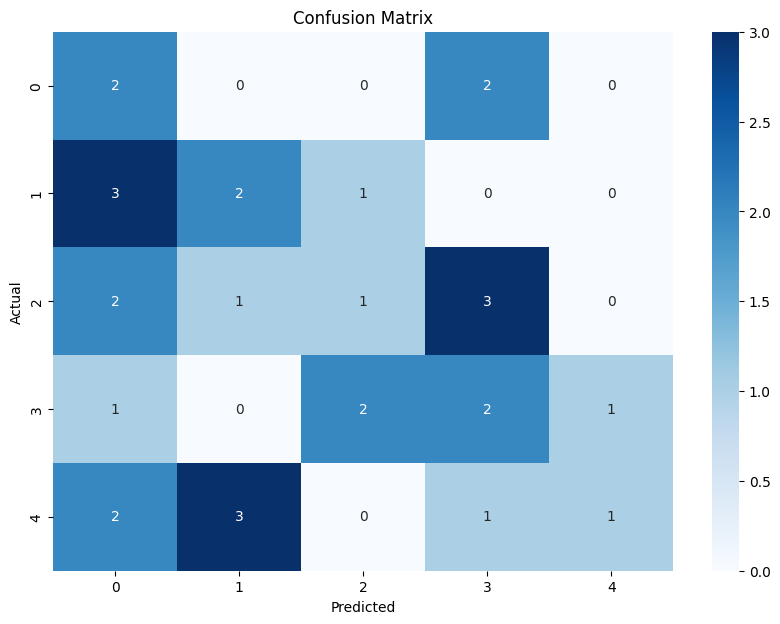

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Example of testing with new data
new_data = pd.DataFrame({
    'Routes': ['Route C'],
    'Transportation modes': ['Road'],
    'Stock levels': [140],
    'Availability': [9],
    'Shipping costs': [575],
    'Number of products sold': [20]
})

# Preprocess new data
new_data['Routes'] = le_routes.transform(new_data['Routes'])
new_data['Transportation modes'] = le_modes.transform(new_data['Transportation modes'])

# Make prediction
new_pred = model.predict(new_data)
recommended_supplier = le_suppliers.inverse_transform(new_pred)

print("Recommended Supplier:", recommended_supplier)

Recommended Supplier: ['Supplier 1']


In [ ]:
# Function to recommend supplier based on input features
def recommend_supplier(model, new_data):
    # Preprocess new data
    new_data['Routes'] = le_routes.transform(new_data['Routes'])
    new_data['Transportation modes'] = le_modes.transform(new_data['Transportation modes'])

    # Get predicted probabilities for each supplier
    probabilities = model.predict_proba(new_data)

    # Get the index of the supplier with the highest probability
    recommended_index = np.argmax(probabilities, axis=1)

    # Decode the supplier names
    recommended_suppliers = le_suppliers.inverse_transform(recommended_index)

    return recommended_suppliers

# Example of testing with new data
new_data = pd.DataFrame({
    'Routes': ['Route C'],
    'Transportation modes': ['Road'],
    'Stock levels': [140],
    'Availability': [9],
    'Shipping costs': [575],
    'Number of products sold': [45]
})
# Make recommendation
recommended_supplier = recommend_supplier(model, new_data)

print("Recommended Supplier:", recommended_supplier)

Recommended Supplier: ['Supplier 1']


#GRAPH NEURAL NETWORKS

In [ ]:
# Install PyTorch
!pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/torch_stable.html

# Install PyTorch Geometric and its dependencies
!pip install torch-geometric
#!pip install torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-1.13.0+cu116.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


df = pd.read_csv('/content/supply_chain_data.csv')

# Encoding categorical features
le_routes = LabelEncoder()
le_modes = LabelEncoder()
le_suppliers = LabelEncoder()

df['Routes'] = le_routes.fit_transform(df['Routes'])
df['Transportation modes'] = le_modes.fit_transform(df['Transportation modes'])
df['Supplier name'] = le_suppliers.fit_transform(df['Supplier name'])

# Create edge index and features
edges = []
for i in range(len(df)):
    for j in range(len(df)):
        if i != j:  # Avoid self-loops
            edges.append((i, j))

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
x = torch.tensor(df[['Routes', 'Transportation modes', 'Stock levels', 'Availability', 'Shipping costs']].values, dtype=torch.float)
y = torch.tensor(df['Supplier name'].values, dtype=torch.long)



In [ ]:
# Create edge index and features
edges = []
for i in range(len(df)):
    for j in range(len(df)):
        if i != j:  # Avoid self-loops
            edges.append((i, j))

edge_index = torch.tensor(edges, dtype=torch.long).t().contiguous()
x = torch.tensor(df[['Routes', 'Transportation modes', 'Stock levels', 'Availability', 'Shipping costs']].values, dtype=torch.float)
y = torch.tensor(df['Supplier name'].values, dtype=torch.long)

# Create the graph data
data = Data(x=x, edge_index=edge_index, y=y)

# Split data into training and testing
train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
train_mask[:4] = 1  # First four nodes for training
data.train_mask = train_mask

test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask[4:] = 1  # Last two nodes for testing
data.test_mask = test_mask

# Define the GNN Model
class GNNModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, 16)
        self.conv2 = GCNConv(16, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model
model = GNNModel(input_dim=x.shape[1], output_dim=len(le_suppliers.classes_))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.NLLLoss()

# Train the model
for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()



In [ ]:
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
import torch
import torch.nn.functional as F
import numpy as np
from sklearn.neighbors import kneighbors_graph

# Create edge index based on k-nearest neighbors (k-NN)
k = 2  # Number of neighbors
adj_matrix = kneighbors_graph(df[['Routes', 'Transportation modes', 'Stock levels', 'Availability', 'Shipping costs']],
                              n_neighbors=k, mode='connectivity', include_self=False)
edges = np.array(adj_matrix.nonzero())  # Create edges based on k-NN
edge_index = torch.tensor(edges, dtype=torch.long)

# Create node features and labels
x = torch.tensor(df[['Routes', 'Transportation modes', 'Stock levels', 'Availability', 'Shipping costs']].values, dtype=torch.float)
y = torch.tensor(df['Supplier name'].values, dtype=torch.long)

# Create the graph data
data = Data(x=x, edge_index=edge_index, y=y)

# Update train and test masks
num_train = int(len(df) * 0.7)  # Use 70% of nodes for training
train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
train_mask[:num_train] = 1
data.train_mask = train_mask

test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask[num_train:] = 1
data.test_mask = test_mask

# Define the GNN Model
class GNNModel(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, 32)  # Increase hidden dimension for complexity
        self.conv2 = GCNConv(32, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.5, training=self.training)  # Add dropout to prevent overfitting
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Initialize the model
model = GNNModel(input_dim=x.shape[1], output_dim=len(le_suppliers.classes_))
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)  # Lower learning rate
criterion = torch.nn.NLLLoss()

# Train the model
for epoch in range(200):  # Increase epochs for better convergence
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluate on test set
model.eval()
with torch.no_grad():
    out = model(data)
    pred = out.argmax(dim=1)
    test_pred = pred[data.test_mask]
    test_true = data.y[data.test_mask]
    accuracy = (test_pred == test_true).sum().item() / test_true.size(0)
    print(f"Test Accuracy: {accuracy:.4f}")


Epoch 0, Loss: 18.3057
Epoch 10, Loss: 9.5530
Epoch 20, Loss: 8.0222
Epoch 30, Loss: 6.2709
Epoch 40, Loss: 4.2544
Epoch 50, Loss: 3.2811
Epoch 60, Loss: 2.4846
Epoch 70, Loss: 2.1345
Epoch 80, Loss: 1.8966
Epoch 90, Loss: 1.8628
Epoch 100, Loss: 1.7107
Epoch 110, Loss: 1.6523
Epoch 120, Loss: 1.4772
Epoch 130, Loss: 1.4727
Epoch 140, Loss: 1.4208
Epoch 150, Loss: 1.4784
Epoch 160, Loss: 1.4561
Epoch 170, Loss: 1.5264
Epoch 180, Loss: 1.4097
Epoch 190, Loss: 1.3885
Test Accuracy: 0.1333


Accuracy: 0.13
Precision: 0.33
Recall: 0.13
F1 Score: 0.12


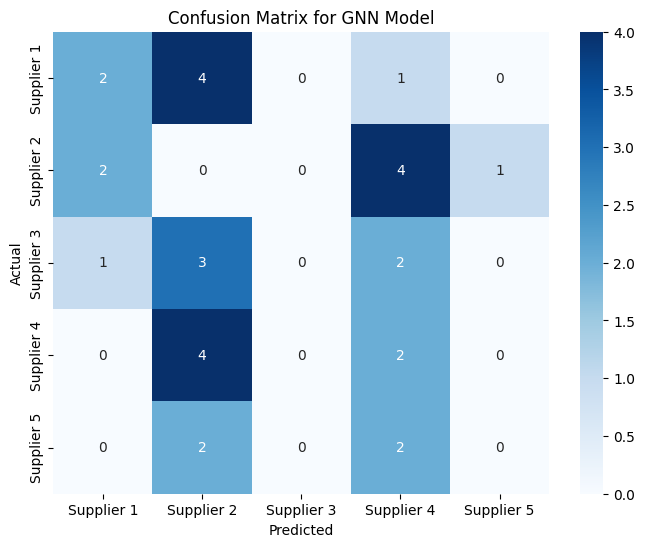

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the model to evaluation mode and make predictions
model.eval()
with torch.no_grad():
    out = model(data)
    y_pred = out[data.test_mask].argmax(dim=1).cpu().numpy()  # Predicted labels
    y_true = data.y[data.test_mask].cpu().numpy()             # True labels

# Evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le_suppliers.classes_, yticklabels=le_suppliers.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GNN Model")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 1.6666666666666667
Mean Squared Error (MSE): 4.133333333333334
Root Mean Squared Error (RMSE): 2.0330600909302543
R-Squared (R²): -1.262773722627737


In [ ]:
# Evaluate the model
model.eval()
with torch.no_grad():
    pred = model(data).argmax(dim=1)
    test_mask = data.test_mask
    correct = (pred[test_mask] == data.y[test_mask]).sum()
    acc = int(correct) / test_mask.sum().item()
    print(f'Test Accuracy: {acc:.4f}')

    # Confusion Matrix
    y_test = data.y[data.test_mask]
    conf_matrix = confusion_matrix(y_test.numpy(), pred[test_mask].numpy())


    #print("Confusion Matrix:")
    print(conf_matrix)



Test Accuracy: 0.1333
[[2 4 0 1 0]
 [2 0 0 4 1]
 [1 3 0 2 0]
 [0 4 0 2 0]
 [0 2 0 2 0]]


In [ ]:
# Example of testing with new data
new_data = pd.DataFrame({
    'Routes': ['Route C'],
    'Transportation modes': ['Road'],
    'Stock levels': [140],
    'Availability': [9],
    'Shipping costs': [575],
    #'Number of products sold': [10]
})

# Preprocess new data
new_data['Routes'] = le_routes.transform(new_data['Routes'])
new_data['Transportation modes'] = le_modes.transform(new_data['Transportation modes'])
new_data_tensor = torch.tensor(new_data.values, dtype=torch.float)

# Create a new graph for the new data
# Connect the new node to itself
new_edges = [(0, 0)]
new_edge_index = torch.tensor(new_edges, dtype=torch.long).t().contiguous()

new_data_graph = Data(x=new_data_tensor, edge_index=new_edge_index)

# Make prediction
model.eval()
with torch.no_grad():
    new_pred_probs = model(new_data_graph)
    new_pred = new_pred_probs.argmax(dim=1)
    recommended_supplier = le_suppliers.inverse_transform(new_pred.numpy())

print("Recommended Supplier:", recommended_supplier)

Recommended Supplier: ['Supplier 2']


In [ ]:
# Example of testing with new data
new_data = pd.DataFrame({
    'Routes': ['Route A'],
    'Transportation modes': ['Air'],
    'Stock levels': [550],
    'Availability': [61],
    'Shipping costs': [20],
    #'Number of products sold': [20]
})
# Preprocess new data
new_data['Routes'] = le_routes.transform(new_data['Routes'])
new_data['Transportation modes'] = le_modes.transform(new_data['Transportation modes'])
new_data_tensor = torch.tensor(new_data.values, dtype=torch.float)

# Create a new graph for the new data
# Connect the new node to itself
new_edges = [(0, 0)]
new_edge_index = torch.tensor(new_edges, dtype=torch.long).t().contiguous()

new_data_graph = Data(x=new_data_tensor, edge_index=new_edge_index)

# Make prediction
model.eval()
with torch.no_grad():
    new_pred_probs = model(new_data_graph)
    new_pred = new_pred_probs.argmax(dim=1)
    recommended_supplier = le_suppliers.inverse_transform(new_pred.numpy())

print("Recommended Supplier:", recommended_supplier)

Recommended Supplier: ['Supplier 2']


In [ ]:
print(new_pred_probs)

#XGBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('/content/supply_chain_data.csv')

# Encoding categorical features
le_routes = LabelEncoder()
le_modes = LabelEncoder()
le_suppliers = LabelEncoder()

df['Routes'] = le_routes.fit_transform(df['Routes'])
df['Transportation modes'] = le_modes.fit_transform(df['Transportation modes'])
df['Supplier name'] = le_suppliers.fit_transform(df['Supplier name'])

# Features and labels
X = df[['Routes', 'Transportation modes', 'Stock levels', 'Availability', 'Shipping costs']]
y = df['Supplier name']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")




[[3 1 0 1 0]
 [0 2 1 1 1]
 [0 1 1 1 1]
 [1 0 2 0 1]
 [1 0 0 1 0]]
Accuracy: 0.3000


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:09:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 1.25
Mean Squared Error (MSE): 2.95
Root Mean Squared Error (RMSE): 1.7175564037317668
R-Squared (R²): -0.7076700434153402


Accuracy: 0.30
Precision: 0.33
Recall: 0.30
F1 Score: 0.31


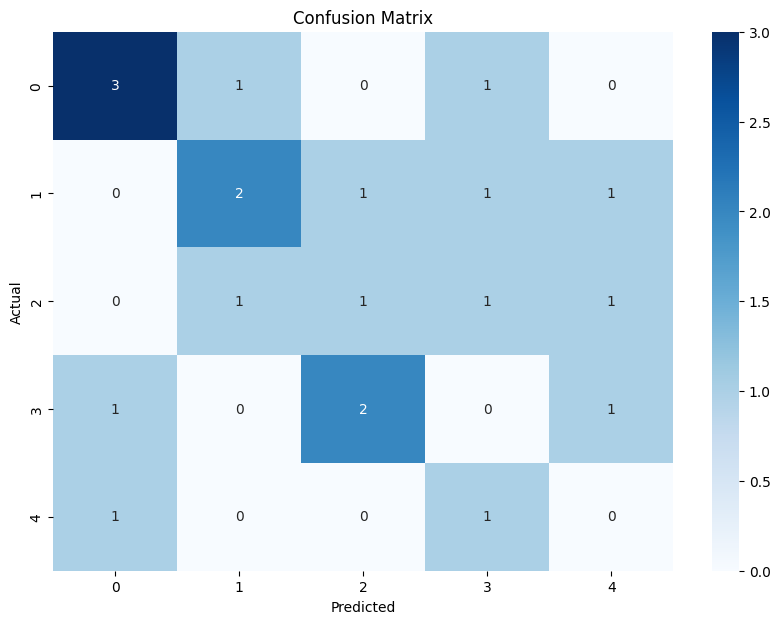

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Example of testing with new data
new_data = pd.DataFrame({
    'Routes': ['Route A'],
    'Transportation modes': ['Air'],
    'Stock levels': [550],
    'Availability': [61],
    'Shipping costs': [90]
})

# Preprocess new data
new_data['Routes'] = le_routes.transform(new_data['Routes'])
new_data['Transportation modes'] = le_modes.transform(new_data['Transportation modes'])

# Make prediction
recommended_supplier = model.predict(new_data)
recommended_supplier_name = le_suppliers.inverse_transform(recommended_supplier)

print("Recommended Supplier:", recommended_supplier_name)


Recommended Supplier: ['Supplier 4']


#DECISION TREE

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=32)

# Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")



Accuracy: 0.225


Accuracy: 0.23
Precision: 0.23
Recall: 0.23
F1 Score: 0.21


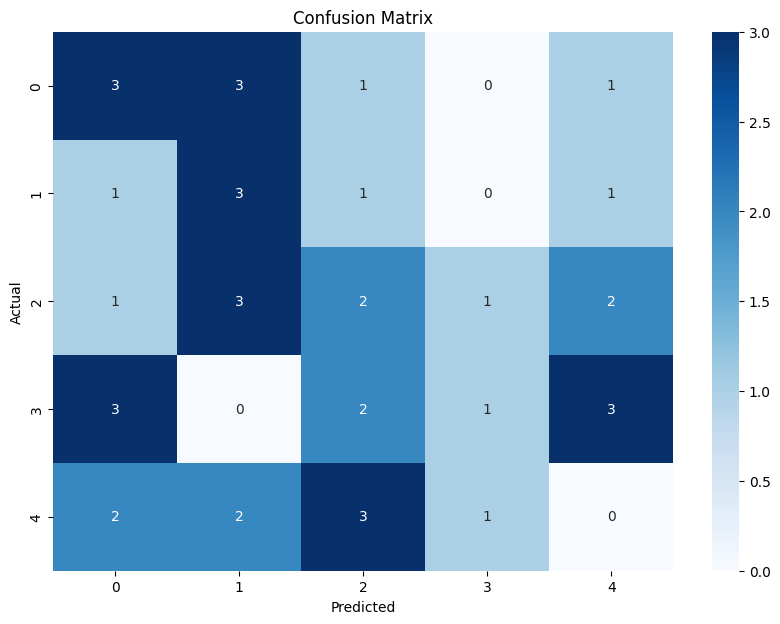

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R²): {r2}")


Mean Absolute Error (MAE): 1.475
Mean Squared Error (MSE): 3.625
Root Mean Squared Error (RMSE): 1.9039432764659772
R-Squared (R²): -0.8406854966677244


In [ ]:
# Example of testing with new data
new_data = pd.DataFrame({
    'Routes': ['Route C'],
    'Transportation modes': ['Road'],
    'Stock levels': [200],
    'Availability': [5],
    'Shipping costs': [697]
})

# Preprocess new data
new_data['Routes'] = le_routes.transform(new_data['Routes'])
new_data['Transportation modes'] = le_modes.transform(new_data['Transportation modes'])

# Make prediction
new_pred = model.predict(new_data)
recommended_supplier = le_suppliers.inverse_transform(new_pred)

print("Recommended Supplier:", recommended_supplier)

Recommended Supplier: ['Supplier 5']
